# Logistic Regression Project 

# Logistic Regression with Python

For this project we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). 

We'll be trying to predict a classification- survival or deceased.  
We have been provided a "semi-cleaned" version of the titanic data set.

## Imports

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

In [ ]:
sns.set_style('whitegrid')

## Get the data

*Reading in the titanic_train.csv file*

In [3]:
df = pd.read_csv('titanic_train.csv')

*Checking the head and obtaining other information from the data*

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

<AxesSubplot:>

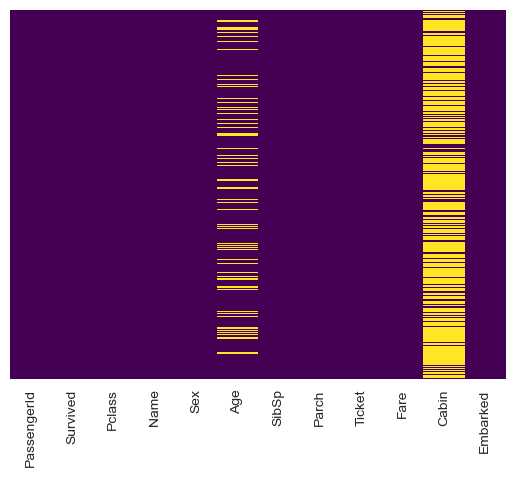

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In the above plot we can clearly see that a lot of data under the 'Cabin' feature and some data under the 'Age' feature is missing.   
This can be problem for our model.

<AxesSubplot:xlabel='Survived', ylabel='count'>

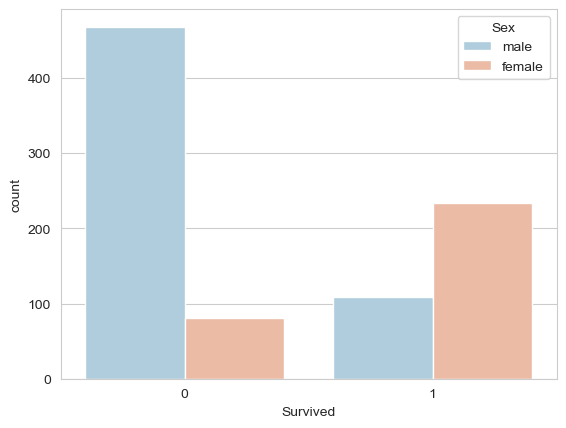

In [6]:
sns.countplot(x='Survived', hue='Sex',data=df, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

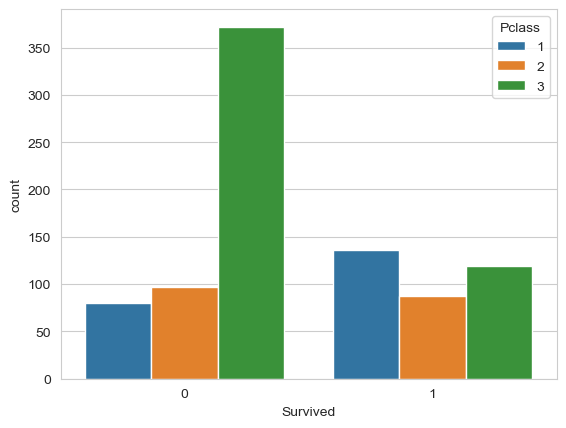

In [7]:
sns.countplot(x='Survived', hue='Pclass',data=df)

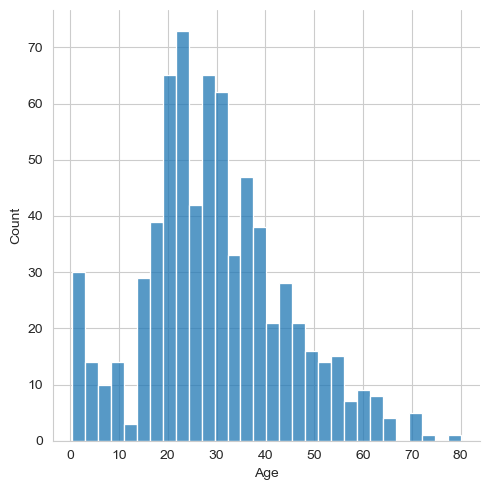

In [11]:
sns.displot(df['Age'].dropna(), kde=False, bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

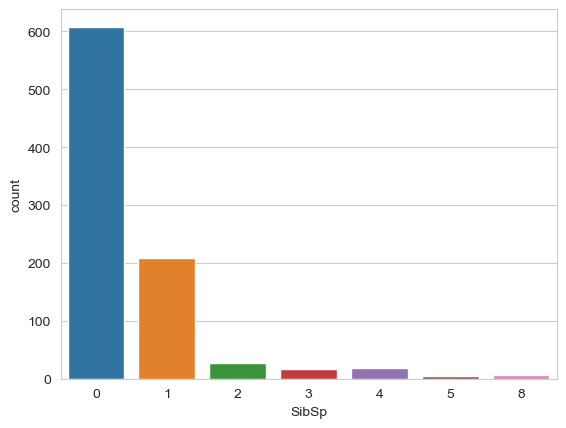

In [12]:
sns.countplot(x='SibSp', data=df)

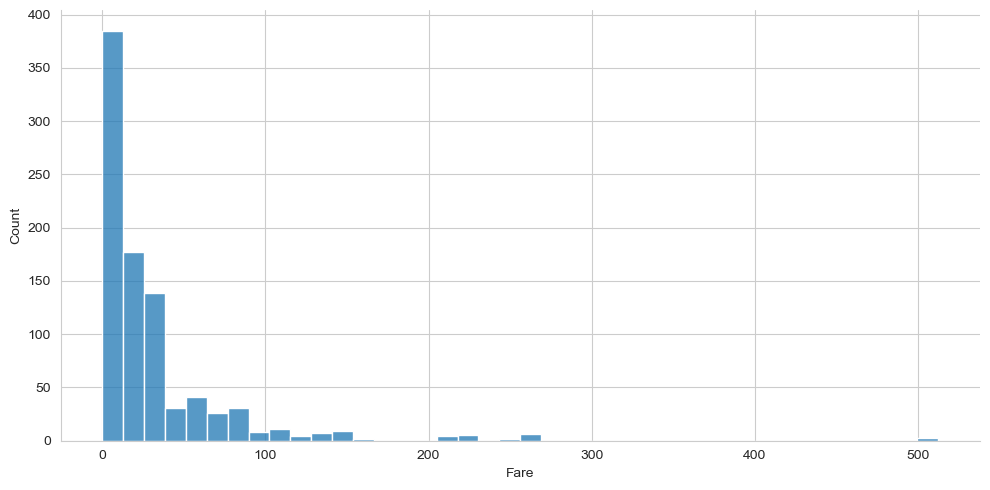

In [13]:
sns.displot(df['Fare'], height=5, aspect=2, bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

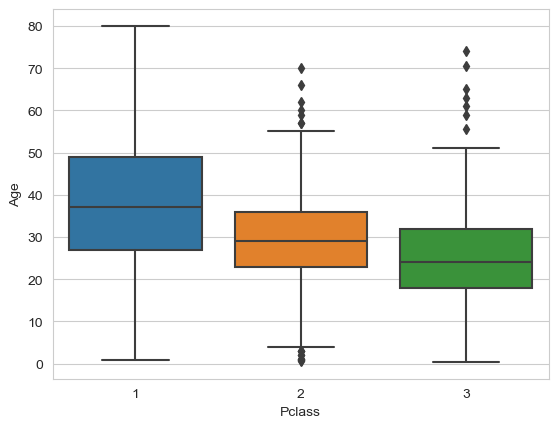

In [14]:
sns.boxplot(x='Pclass', y='Age', data=df)

## Cleaning the data   

*Removing the unusable columns and null values from the data using the information obtained from the EDA*


In [17]:
def input_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
        
    else: 
        return Age

In [18]:
df['Age'] = df[['Age', 'Pclass']].apply(input_age, axis=1)

<AxesSubplot:>

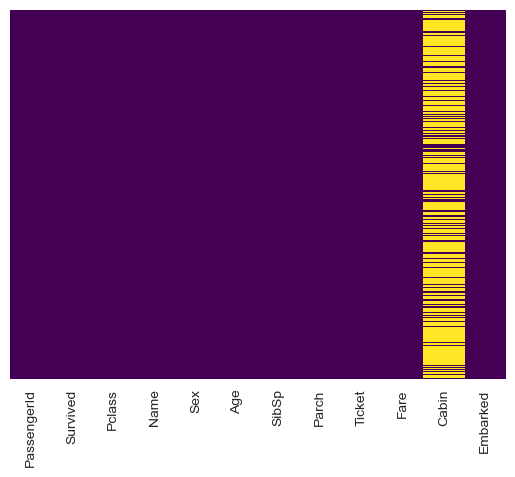

In [19]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

From the above graph we can see that most of the rows under the 'cabin' column have NULL as value.   
Missing information of this huge an amount can't be proxied in using estimation and EDA like in the above case with 'Age' column.   
Thus, it would be better to just drop the column instead of providing our model dubious data to work with.

In [20]:
df.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

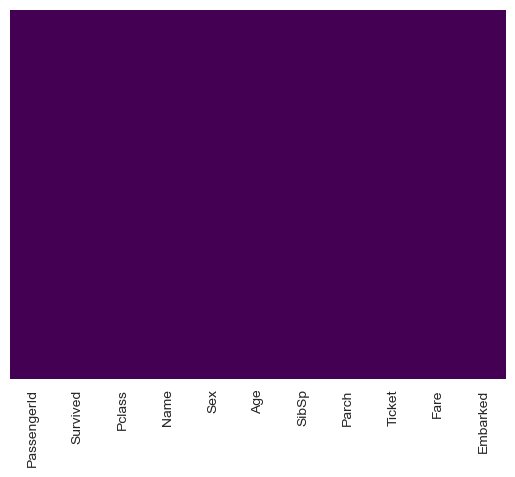

In [21]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*converting categorical columns into binary numerical columns*

In [22]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [10]:
df['Embarked'].nunique()

3

In [23]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [24]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
df = pd.concat([df, sex, embark], axis=1)

In [26]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [27]:
df.drop(['Embarked', 'Sex', 'Name', 'Ticket'], axis=1, inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


*Dropping 'PassengerId' since it is only being used as an index and has no real use for our model*

In [29]:
df.drop('PassengerId', axis=1, inplace=True)

In [30]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## Buildind our Model   

Now that we've explored and cleaned the data, we can now build a Logistic Regression model using the dataset.

In [31]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Training the Model

In [33]:
logmodel = LogisticRegression( solver='liblinear', multi_class='ovr', n_jobs=1)

In [34]:
logmodel.fit(X_train, y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

### Predicting Test Data

Now that we have fit our model, let's evaluate its performance by predicting off the test values

In [35]:
predictions = logmodel.predict(X_test)

In [36]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       169
           1       0.83      0.65      0.73        99

    accuracy                           0.82       268
   macro avg       0.82      0.78      0.80       268
weighted avg       0.82      0.82      0.82       268



In [37]:
confusion_matrix(y_test, predictions)

array([[156,  13],
       [ 35,  64]], dtype=int64)